In [16]:
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

matplotlib.rcParams['figure.figsize']=(10,6)

In [17]:
df= pd.read_csv('weight-height.csv')
df.sample(20)

,Gender,Height,Weight
1819,Male,72.337569,216.713478
265,Male,64.931342,181.093870
2238,Male,69.612990,184.198452
9240,Female,58.954923,99.178984
1510,Male,67.985975,185.687955
152,Male,70.844062,195.937015
2243,Male,62.948951,154.059125
3335,Male,72.362112,207.394830
5072,Female,60.578063,118.242812
871,Male,71.427575,201.842809


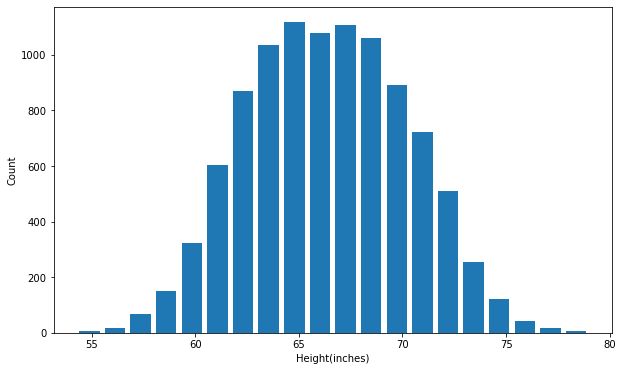

In [18]:
plt.hist(df.Height, bins=20,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel("Count")
plt.show()

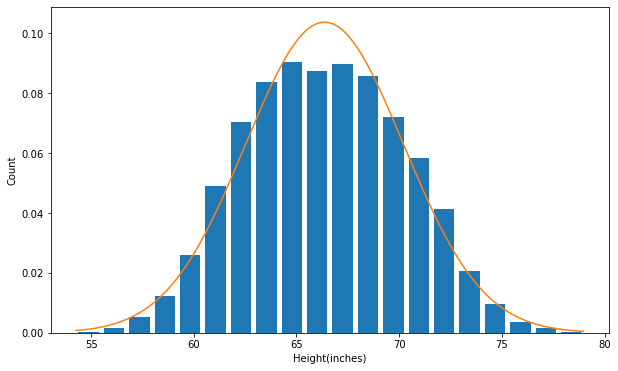

In [21]:
from scipy.stats import norm
plt.hist(df.Height, bins=20, rwidth=0.8, density= True)
plt.xlabel('Height(inches)')
plt.ylabel("Count")

rng= np.arange(df.Height.min(), df.Height.max(), 0.1)
plt.plot(rng, norm.pdf(rng,df.Height.mean(), df.Height.std()))

In [28]:
df.describe()


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [27]:
standard_deviation= df.Height.std()
df.shape

(10000, 3)

In [37]:
min_threshold= df.Height.mean()- 3*standard_deviation
max_threshold= df.Height.mean()+ 3*standard_deviation

In [38]:
df[(df.Height>max_threshold)| (df.Height< min_threshold)]

,Gender,Height,Weight


In [40]:

df_no_outlier=df[(df.Height<max_threshold) & (df.Height>min_threshold)]
df_no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


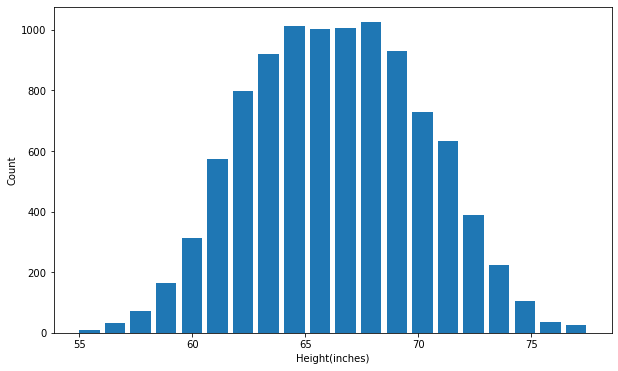

In [45]:
plt.hist(df.Height, bins=20,rwidth=0.8)
plt.xlabel('Height(inches)')
plt.ylabel("Count")
plt.show()

In [46]:
df['zscore']= (df.Height-df.Height.mean())/df.Height.std()
df

<ipython-input-46-13cad32c2e72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore']= (df.Height-df.Height.mean())/df.Height.std()


,Gender,Height,Weight,z-score,zscore
0,Male,73.847017,241.893563,1.951021,1.951021
1,Male,68.781904,162.310473,0.630437,0.630437
2,Male,74.110105,212.740856,2.019613,2.019613
3,Male,71.730978,220.042470,1.399324,1.399324
4,Male,69.881796,206.349801,0.917202,0.917202
...,...,...,...,...,...
9995,Female,66.172652,136.777454,-0.049851,-0.049851
9996,Female,67.067155,170.867906,0.183365,0.183365
9997,Female,63.867992,128.475319,-0.650725,-0.650725
9998,Female,69.034243,163.852461,0.696227,0.696227


In [51]:
df[(df.zscore<-2.5)| (df.zscore>2.5)]

,Gender,Height,Weight,z-score,zscore
190,Male,76.709835,235.035419,2.697419,2.697419
232,Male,76.021347,235.926061,2.517915,2.517915
430,Male,76.027082,232.313471,2.519410,2.519410
673,Male,76.501883,217.882346,2.643201,2.643201
741,Male,76.012300,235.437966,2.515556,2.515556
...,...,...,...,...,...
8241,Female,56.167299,77.898559,-2.658461,-2.658461
8692,Female,55.651892,85.621776,-2.792839,-2.792839
8853,Female,56.548843,90.847589,-2.558984,-2.558984
9760,Female,56.534166,97.743896,-2.562811,-2.562811
